In [20]:
import numpy as np
from sklearn . datasets import load_digits
import matplotlib.pyplot as plt


import sklearn
from sklearn.datasets import load_digits
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score

# Exercise 5

## 1) Bias and variance of ridge regression
In ridge regression, we want to solve the regularized least squares problem

$$
\hat\beta_\tau = \text{argmin}_\beta(y-X\beta)^\top(y-X\beta)+\tau\beta^\top\beta
$$

with $\tau \ge 0$. To find $\hat\beta_\tau$, we minimize the loss with respect to $\beta$ by calculating $\partial_\beta$Loss $\overset{!}{=}0$:

$$
\begin{align}
\partial_\beta \left( (X \beta - y)^\top (X \beta - y) + \tau \beta^\top \beta \right) &= 0 \\
\partial_\beta \left( (X \beta)^\top X \beta - (X \beta)^\top y - y^\top X \beta - y^\top y + \tau \beta^\top \beta \right) &= 0 \\
\partial_\beta \left( (X \beta)^\top X \beta - 2\beta^\top X^\top y - y^\top y + \tau \beta^\top \beta \right) &= 0 \\
2 X^\top X \hat{\beta}_\tau - 2X^\top y + 2 \tau \hat{\beta}_\tau &= 0 \\
\Leftrightarrow -X^\top y+X^\top X\hat\beta_\tau+\tau\hat\beta_\tau&=0\\
\Leftrightarrow X^\top X\hat\beta_\tau+\tau\hat\beta_\tau&=X^\top y\\
\Leftrightarrow (X^\top X+\tau\mathbb{I}_D)\hat\beta_\tau&=X^\top y
\end{align}
$$

Introducing the regularized scatter matrix $S_\tau=X^\top X+\tau\mathbb{I}_D$, we can rewrite this as:

$$
\begin{align}
S_\tau\hat\beta_\tau&=X^\top y\\
\hat\beta_\tau&=S_\tau^{-1}X^\top y
\end{align}
$$

We now want to compute the expectation of $\hat\beta_\tau$ over all possible training sets of size N. Note that we calculate the expectation conditioned on X, so X is not a random variable here and can be treated as fixed.

$$
\mathbb{E}[\hat\beta_\tau]=\mathbb{E}[S_\tau^{-1}X^\top y]=S_\tau^{-1}X^\top\mathbb{E}[y]
$$

Using the assumption that the true model is $y=X\beta^*+\varepsilon$ with $\varepsilon\sim\mathcal{N}(0, \sigma^2)$, we can rewrite this (using $S=X^\top X$) as

$$
\begin{align}
\mathbb{E}[\hat\beta_\tau]&=S_\tau^{-1}X^\top\mathbb{E}[X\beta^*+\varepsilon]\\
&=\mathbb{E}[S_\tau^{-1}S\beta^*]+S_\tau^{-1}X^\top\underbrace{\mathbb{E}[\varepsilon]}_{=0}\\
&=S_\tau^{-1}S\beta^*
\end{align}
$$

Next, we compute the covariance $\text{Cov}[\hat\beta_\tau]$.

From the definition of the covariance we know that
$$
\begin{align}
\text{Cov}[\hat\beta_\tau]&=\text{Var}[\hat\beta_\tau]\\
&=\text{Var}[S_\tau^{-1}X^\top y]\\
&=\text{Var}[S_\tau^{-1}X^\top X\beta^*+S_\tau^{-1}X^\top \varepsilon]
\end{align}
$$

As the terms $S_\tau^{-1}X^\top X\beta^*$ and $S_\tau^{-1}X^\top$ are constant, we can use the property that for a constant matrix $A$ and a constant vector $a$ it holds that $\text{Var}(AZ+a)=A\text{Var}[Z]A^\top$. We obtain

$$
\begin{align}
\text{Cov}[\hat\beta_\tau]&=S_\tau^{-1}X^\top\text{Var}[\varepsilon](S_\tau^{-1}X^\top)^\top\\
&=S_\tau^{-1}X^\top\sigma^2(S_\tau^{-1}X^\top)^\top\\
&=S_\tau^{-1}X^\top XS_\tau^{-1}\sigma^2\\
&=S_\tau^{-1}SS_\tau^{-1}\sigma^2
\end{align}
$$


## 3) Automatic feature selection for LDA as regression

In [19]:
digits = load_digits()
print (digits.keys ())
data = digits ["data"]
images = digits ["images"]
target = digits ["target"]
target_names = digits ["target_names"]
print(np.shape(data))


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


In [27]:
# Load data
digits = load_digits()
data = digits["data"]
target = digits["target"]
# Data filering
num_1, num_2 = 3, 9
mask = np.logical_or(target == num_1, target == num_2)
data = data[mask]/data.max()
target = target[mask]
# Relabel targets
target[target == num_1] = -1
target[target == num_2] = 1

print(np.shape(target))
print(np.shape(data))
#print(data[[0,1,2]])

(363,)
(363, 64)


In [70]:
def omp_regression(X,y,Tin):
    A = []
    B = np.arange(0,len(X[1]),1)
    r = y                               #initial res
    Betas = np.zeros((len(X[1]),Tin))
    print(np.shape(X))
    for t in range(Tin):
        
        j = np.argmax(np.abs(((X[:,B]).T)@r))
        A.append(j)
        B = np.delete(B,j)
        X_t = np.array(X[:,A])
        
        beta = (np.linalg.inv(X_t.T@X_t)@X_t.T)@y #(xtx)-1xty
        
        r = y-X_t@beta
        Betas[A,t] = beta
    return Betas

        
        
        

(363, 64)
Result shape   (64, 6)



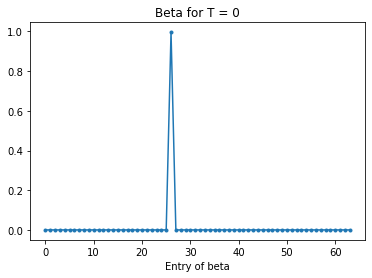

Error rate for T =  1   0.36215958428837275


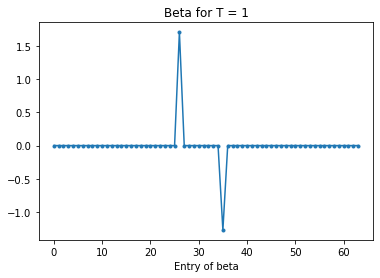

Error rate for T =  2   0.2934545490749419


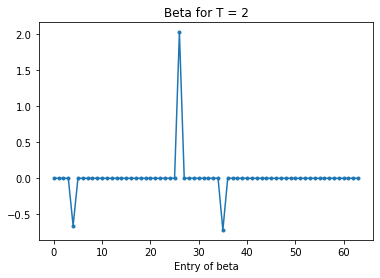

Error rate for T =  3   0.22889282586146936


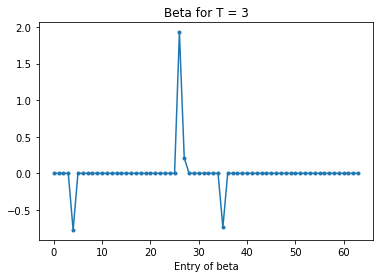

Error rate for T =  4   0.22774250677271646


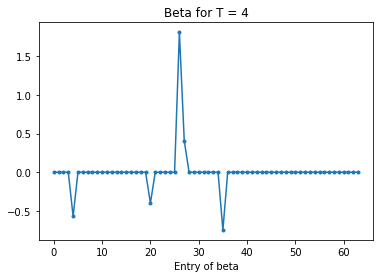

Error rate for T =  5   0.21985238323785466


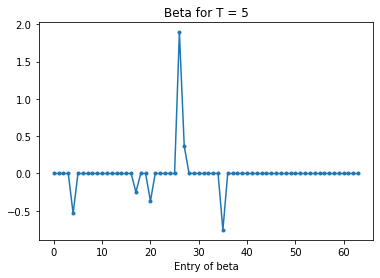

Error rate for T =  6   0.2188110996135983


In [109]:
T = 6
result = omp_regression(data,target,Tin=T)
print("Result shape  ",np.shape(result))
print("")

for i in range(T):
    plt.title("Beta for T = "+str(i))
    plt.plot(result.T[i], marker = ".") 
    plt.xlabel("Entry of beta")
    plt.show()
  
    print("Error rate for T = ",i+1," ",np.sum(np.abs(target-data@result.T[i])/2/363))
    
#print(np.shape(np.linalg.inv(data.T@data)))

In [95]:
print(np.sum(data))
print(np.sum(np.abs(data)))

7033.9375
7033.9375


The data cotain only positive values. Thus, positive $\beta$ vote in favor of 3 and vice versa. It makes sense that more entries of $\beta$ tend towards 9 as the number 9 is represented with more pixels in the image.
Between 3 and 6 pixels should be used for an optimal result. 7 pixels result in a crashing algorithm since the seventh pixel only adds noise to $X_t$. We now repeat the algorithm with standardized data:

(363, 64)
Result shape   (64, 6)



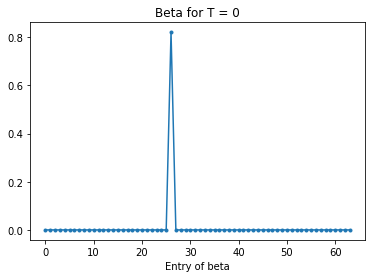

Error rate for T =  1   0.3835457013820843


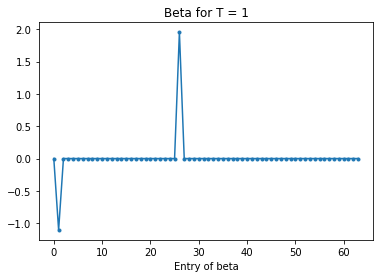

Error rate for T =  2   0.24821787509121906


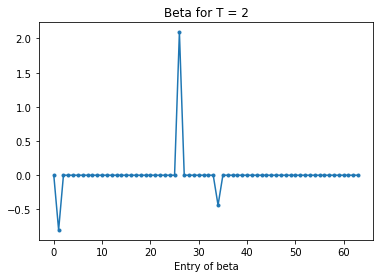

Error rate for T =  3   0.2427684604868166


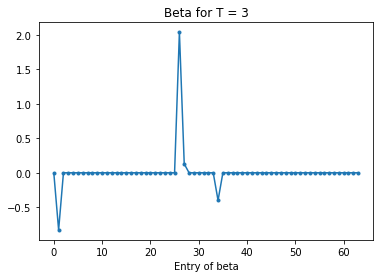

Error rate for T =  4   0.24209983037409472


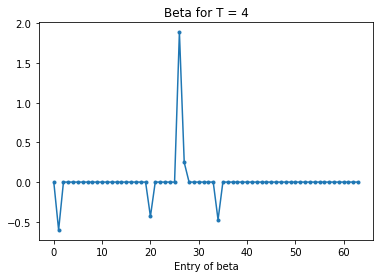

Error rate for T =  5   0.23906183962593897


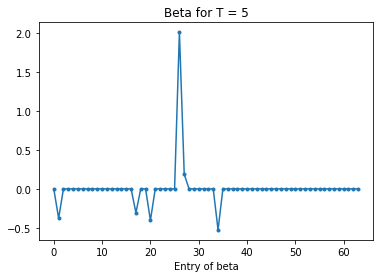

Error rate for T =  6   0.23679029737679919


In [108]:
data_norm = (np.array(data)-np.mean(data)/(np.std(data)))

T = 6
result_norm = omp_regression(data_norm,target,Tin=T)
print("Result shape  ",np.shape(result_norm))
print("")

for i in range(T):
    plt.title("Beta for T = "+str(i))
    plt.plot(result_norm.T[i], marker = ".") 
    plt.xlabel("Entry of beta")
    plt.show()
  
    print("Error rate for T = ",i+1," ",np.sum(np.abs(target-data_norm@result_norm.T[i])/2/363))

It is not beneficial to standardize the data. 

I chose pixels 26, 16, 21 and 29 on sheet 1. 

In [104]:
print("Indices of selected pixels:")
print(*np.nonzero(result.T[5]))

Indices of selected pixels:
[ 1 17 20 26 27 34]


Pixel 26 matched and when looking at the images, it provides the best basis for determining whether an image shows a 3 or a 9.